<a href="https://colab.research.google.com/github/gautam-pai/BusinessAnalytics/blob/main/Time_Based_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [ ]:
#df=pd.read_excel('/content/drive/MyDrive/Business Analytics /Dataset/OnlineRetail.xlsx')
df=pd.read_excel('OnlineRetail.xlsx')

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df_cleaned=df[df['Quantity']>0]
df_cleaned=df_cleaned[df_cleaned['Description'].str.contains(".*?", na=False)]
df_cleaned=df_cleaned.dropna()
print(df_cleaned.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
df_cleaned.shape

(397924, 8)

In [ ]:
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df_cleaned["Expenditure"]=df_cleaned['Quantity']*df_cleaned['UnitPrice']

In [ ]:
df_cleaned['Month']=df_cleaned['InvoiceDate'].dt.month

In [ ]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Expenditure
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [ ]:
new_df=df_cleaned[df_cleaned['Country']=='United Kingdom']

In [ ]:
new_df.shape

(354345, 10)

In [ ]:
new_df=df_cleaned.groupby('Month').agg({
  'Expenditure'  : 'sum',
    'InvoiceNo' : 'count'
})

In [ ]:
new_df.rename(columns={
    'InvoiceNo':'Total Invoices',
    'Expenditure':'Total Expenditure',

},inplace=True)

In [ ]:

new_df['Average Invoice Value']=new_df['Total Expenditure']/new_df['Total Invoices']

In [ ]:
new_df

,Total Expenditure,Total Invoices,Average Invoice Value
Month,,,
1,569445.040,21232,26.820132
2,447137.350,19928,22.437643
3,595500.760,27177,21.911939
4,469200.361,22644,20.720737
5,678594.560,28322,23.959980
6,661213.690,27185,24.322740
7,600091.011,26827,22.368920
8,645343.900,27013,23.890123
9,952838.382,40030,23.803107


In [ ]:
eww=new_df['Average']

Index(['Total Expenditure', 'Total Invoices', 'Average Invoice Value'], dtype='object')

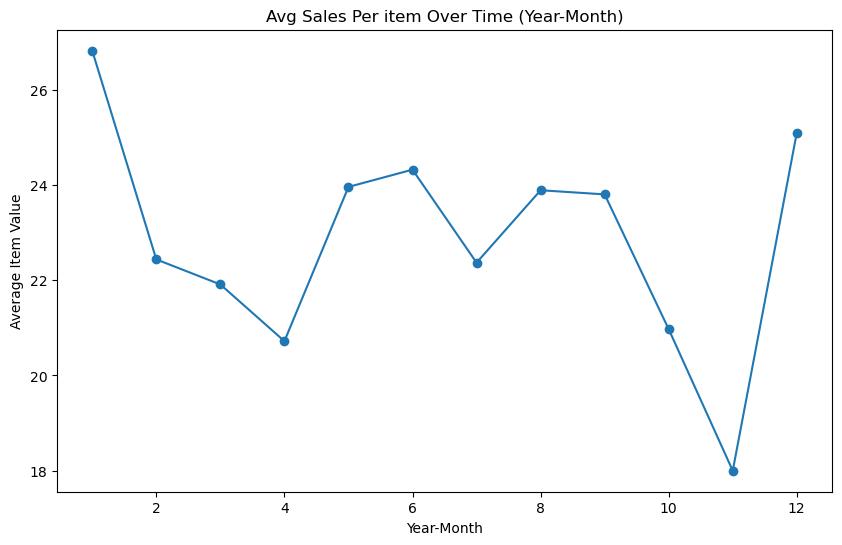

In [ ]:
plt.figure(figsize=(10,6))
new_df['Average Invoice Value'].plot(kind='line', marker='o', title='Avg Sales Per item Over Time (Year-Month)')
plt.ylabel('Average Item Value')
plt.xlabel('Year-Month')
plt.show()
